In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm

%matplotlib inline

In [7]:
# Load data + pull out images and lables
labeled_images = pd.read_csv("./data/digits-recognizer/train.csv")

images = labeled_images.iloc[0:5000, 1:]
labels = labeled_images.iloc[0:5000, :1]

In [8]:
# Split data into train and test datasets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Text(0.5,1,u'3')

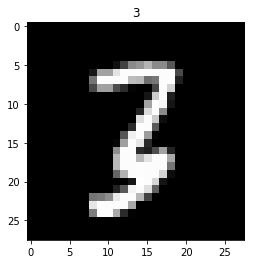

In [9]:
# Viewing an image
i = 2  # image index 
img = train_images.iloc[i].as_matrix()  # transform one-dimention image into a 1-d numpy array
img = img.reshape((28, 28))  # reshape numpy 1d array inti 2d 28x28 array
plt.imshow(img, cmap='gray')
plt.title(train_labels.iloc[i, 0])  # Put the image a title by it's label


(array([662.,  11.,   5.,   8.,   7.,   7.,  11.,   9.,   9.,  55.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

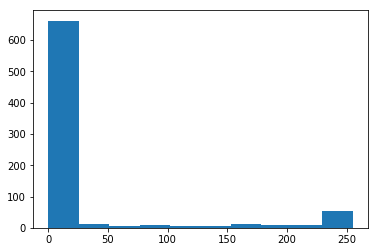

In [73]:
# in order to understand the image we can plot the histogram of our possible pixel values
plt.hist(train_images.iloc[i])
# we can see that our pixels not really with values of 1 and 0, and it might have affect
# on our model.

In [10]:
# Train our model
# TODO: Read about Support vector machine
clf = svm.SVC()  # TODO: what are the model input args option?
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

# The score we got is the accuracy of our model, e.g: if we got 0.1 it means that only 0.1 
# of our test data predicted exactly as labled, therefor - only 10% success


0.1

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:2554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,u'label    6\nName: 3275, dtype: int64')

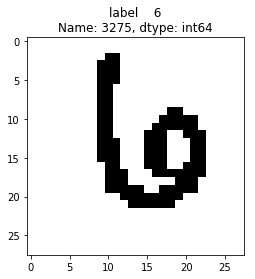

In [11]:
# Our images are white digits on black background, now we'll try to change the background
# to white and the digits to black so the digits (pixels) will be easier to detect
i = 1
# TODO: what is the syntax of x > 0 -> 1 means?
test_images[test_images > 0] = 1
train_images[train_images > 0] = 1

img = train_images.iloc[i].as_matrix().reshape((28, 28))
plt.imshow(img, cmap='binary')
plt.title(train_labels.iloc[i])


(array([668.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

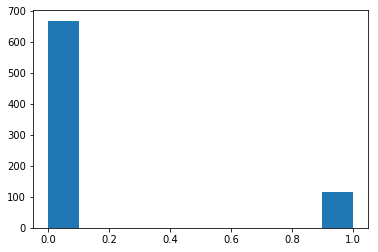

In [12]:
# now after we changed the colors and removed our gray area of pixels we can plot the image's
# color histogram again
plt.hist(train_images.iloc[i])
# now we can see that all the pixels are with values of 1 and 0

In [13]:
# SVM
# now we'll train again our model but with the new pix format
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)
# and we got better accuracy! (0.887 in compare to 0.1)

0.887